# 1. Data Exploration and Preprocessing

In [4]:
import networkx as nx

# Load the facebook_combined.txt as an undirected graph
file_path = 'facebook_combined.txt'
G = nx.read_edgelist(file_path, create_using=nx.Graph(), nodetype=int)

# Basic info about the network
print(nx.info(G))


Graph with 4039 nodes and 88234 edges


C:\Users\anant\AppData\Local\Temp\ipykernel_26180\3140007774.py:8: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


In [5]:
# List of isolated nodes (if any)
isolated_nodes = list(nx.isolates(G))
print(f"Number of isolated nodes: {len(isolated_nodes)}")

if isolated_nodes:
    print(f"Isolated nodes: {isolated_nodes}")


Number of isolated nodes: 0


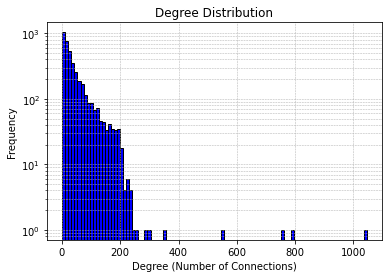

In [9]:
import matplotlib.pyplot as plt

# Get degree of each node
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)

# Plot degree distribution
plt.hist(degree_sequence, bins=100, color='blue', edgecolor='black')
plt.title("Degree Distribution")
plt.xlabel("Degree (Number of Connections)")
plt.ylabel("Frequency")
plt.yscale('log')  # Log scale for better visibility of distribution
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()


In [7]:
# Calculate the average degree
average_degree = sum(degree_sequence) / G.number_of_nodes()
print(f"Average number of connections per user: {average_degree:.2f}")


Average number of connections per user: 43.69


In [11]:
import numpy as np

# Calculate mean and standard deviation for outlier detection
mean_degree = np.mean(degree_sequence)
std_degree = np.std(degree_sequence)

# Define outliers as nodes with degrees > mean + 2*std or < mean - 2*std
upper_threshold = mean_degree + 2 * std_degree
lower_threshold = mean_degree - 2 * std_degree

# Identify outliers
outliers_high = [n for n, d in G.degree() if d > upper_threshold]
outliers_low = [n for n, d in G.degree() if d < lower_threshold]

print(f"Upper threshold for outliers: {upper_threshold:.2f}")
print(f"Lower threshold for outliers: {lower_threshold:.2f}")
print(f"Number of highly connected outliers: {len(outliers_high)}")
print(f"Number of lowly connected outliers: {len(outliers_low)}")

if outliers_high:
    print(f"Highly connected outliers (User IDs): {outliers_high}")
if outliers_low:
    print(f"Lowly connected outliers (User IDs): {outliers_low}")


Upper threshold for outliers: 148.52
Lower threshold for outliers: -61.14
Number of highly connected outliers: 216
Number of lowly connected outliers: 0
Highly connected outliers (User IDs): [0, 107, 348, 414, 1684, 1912, 483, 925, 946, 993, 1017, 1059, 1078, 1086, 1126, 1184, 1185, 1199, 1211, 1238, 1352, 1367, 1376, 1377, 1390, 1391, 1399, 1431, 1471, 1516, 1522, 1551, 1554, 1557, 1559, 1577, 1584, 1589, 1610, 1612, 1613, 1621, 1622, 1663, 1707, 1714, 1718, 1730, 1736, 1746, 1768, 1799, 1800, 1804, 1813, 1827, 1833, 1835, 1839, 1879, 1888, 2007, 2054, 2081, 2111, 2133, 2199, 2283, 2289, 2336, 2384, 2543, 2598, 3437, 686, 1941, 2047, 2087, 2266, 2282, 2328, 2333, 2347, 2542, 2468, 1917, 1918, 1929, 1938, 1943, 1946, 1962, 1966, 1971, 1979, 1983, 1984, 1985, 1986, 1993, 2005, 2020, 2030, 2033, 2037, 2040, 2043, 2045, 2059, 2064, 2069, 2073, 2074, 2078, 2088, 2090, 2093, 2095, 2103, 2104, 2108, 2112, 2118, 2121, 2123, 2124, 2131, 2139, 2140, 2142, 2150, 2154, 2172, 2184, 2188, 2190, 220

# 2)Graph Construction

density=how many edges are there/how many total combinations of edges can the there
for ex: 1 2 
    3 4
2 edges are there but total edges can be 12

In [13]:
# Calculate network density
density = nx.density(G_lcc)
print(f"Network Density: {density:.6f}")


Network Density: 0.010820


In [15]:
# Calculate the diameter of the network
diameter = nx.diameter(G_lcc)
print(f"Diameter of the Network: {diameter}")


Diameter of the Network: 8


In [16]:
# Calculate the average path length
avg_path_length = nx.average_shortest_path_length(G_lcc)
print(f"Average Path Length: {avg_path_length:.4f}")


Average Path Length: 3.6925


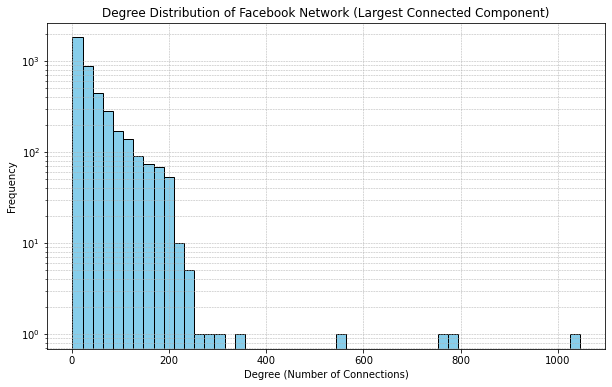

In [17]:
import matplotlib.pyplot as plt

# Extract degree of each node
degree_sequence = sorted([d for n, d in G_lcc.degree()], reverse=True)

# Plot the degree distribution
plt.figure(figsize=(10,6))
plt.hist(degree_sequence, bins=50, color='skyblue', edgecolor='black')
plt.title("Degree Distribution of Facebook Network (Largest Connected Component)")
plt.xlabel("Degree (Number of Connections)")
plt.ylabel("Frequency")
plt.yscale('log')  # Log scale for better visibility
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()


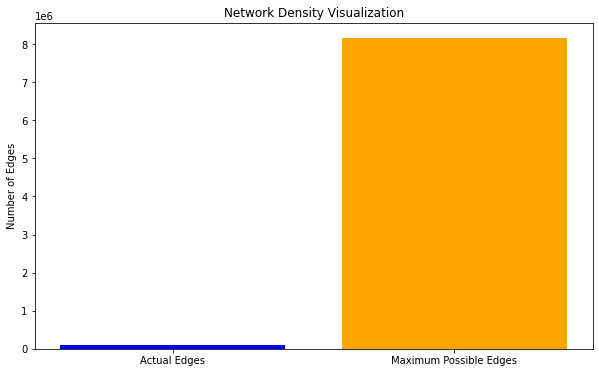

In [18]:
# Calculate maximum possible edges
num_nodes = G_lcc.number_of_nodes()
max_edges = num_nodes * (num_nodes - 1) / 2

# Actual edges
actual_edges = G_lcc.number_of_edges()

# Plot
plt.figure(figsize=(10,6))
plt.bar(['Actual Edges', 'Maximum Possible Edges'], [actual_edges, max_edges], color=['blue', 'orange'])
plt.title("Network Density Visualization")
plt.ylabel("Number of Edges")
plt.show()


In [ ]:
3

In [19]:
pip install networkx matplotlib


# 3. Identify Key Influencers:

In [20]:
# Calculate degree centrality
degree_centrality = nx.degree_centrality(G_lcc)

# Convert to dictionary and sort by centrality
sorted_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)


In [21]:
# Calculate closeness centrality
closeness_centrality = nx.closeness_centrality(G_lcc)

# Convert to dictionary and sort by centrality
sorted_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)


In [22]:
import time

# Optional: Compute betweenness centrality with normalization
start_time = time.time()
betweenness_centrality = nx.betweenness_centrality(G_lcc, normalized=True)
end_time = time.time()
print(f"Betweenness Centrality calculated in {end_time - start_time:.2f} seconds")

# Convert to dictionary and sort by centrality
sorted_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)


Betweenness Centrality calculated in 303.52 seconds


In [23]:
# Calculate PageRank
pagerank = nx.pagerank(G_lcc, alpha=0.85)

# Convert to dictionary and sort by PageRank
sorted_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)


In [25]:
# Define the number of top users to extract
TOP_N = 5

# Top Degree Centrality
top_degree = sorted_degree[:TOP_N]
print("Top Degree Centrality:")
for user, centrality in top_degree:
    print(f"User {user}: {centrality:.4f}")

print("\nTop Closeness Centrality:")
top_closeness = sorted_closeness[:TOP_N]
for user, centrality in top_closeness:
    print(f"User {user}: {centrality:.4f}")

print("\nTop Betweenness Centrality:")
top_betweenness = sorted_betweenness[:TOP_N]
for user, centrality in top_betweenness:
    print(f"User {user}: {centrality:.4f}")

print("\nTop PageRank:")
top_pagerank = sorted_pagerank[:TOP_N]
for user, rank in top_pagerank:
    print(f"User {user}: {rank:.6f}")


Top Degree Centrality:
User 107: 0.2588
User 1684: 0.1961
User 1912: 0.1870
User 3437: 0.1355
User 0: 0.0859

Top Closeness Centrality:
User 107: 0.4597
User 58: 0.3974
User 428: 0.3948
User 563: 0.3939
User 1684: 0.3936

Top Betweenness Centrality:
User 107: 0.4805
User 1684: 0.3378
User 3437: 0.2361
User 1912: 0.2293
User 1085: 0.1490

Top PageRank:
User 3437: 0.007615
User 107: 0.006936
User 1684: 0.006367
User 0: 0.006290
User 1912: 0.003877


comparing

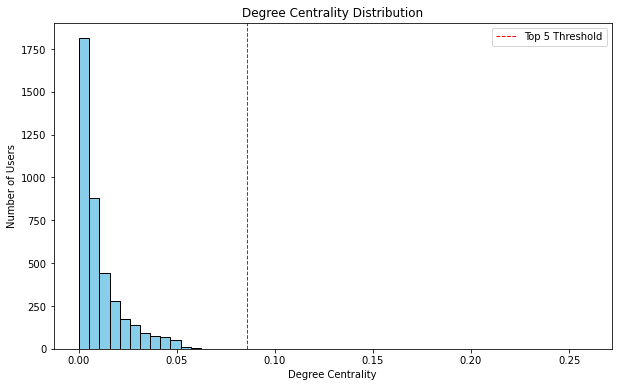

In [26]:
import matplotlib.pyplot as plt

# Extract degree centrality values
degree_values = list(degree_centrality.values())

plt.figure(figsize=(10,6))
plt.hist(degree_values, bins=50, color='skyblue', edgecolor='black')
plt.title("Degree Centrality Distribution")
plt.xlabel("Degree Centrality")
plt.ylabel("Number of Users")
plt.axvline(x=top_degree[-1][1], color='red', linestyle='dashed', linewidth=1, label=f"Top {TOP_N} Threshold")
plt.legend()
plt.show()


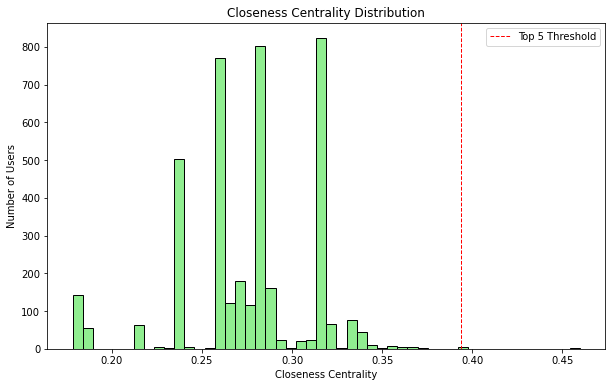

In [27]:
# Extract closeness centrality values
closeness_values = list(closeness_centrality.values())

plt.figure(figsize=(10,6))
plt.hist(closeness_values, bins=50, color='lightgreen', edgecolor='black')
plt.title("Closeness Centrality Distribution")
plt.xlabel("Closeness Centrality")
plt.ylabel("Number of Users")
plt.axvline(x=top_closeness[-1][1], color='red', linestyle='dashed', linewidth=1, label=f"Top {TOP_N} Threshold")
plt.legend()
plt.show()


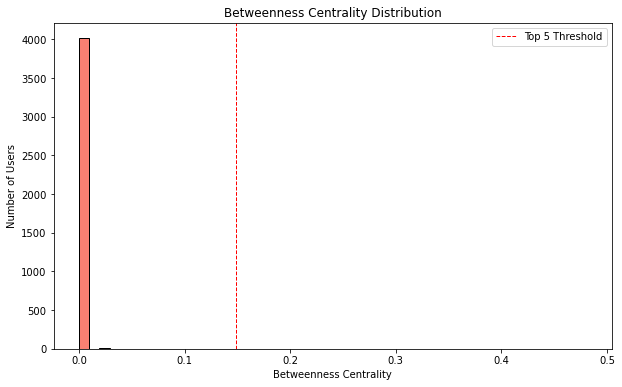

In [28]:
# Extract betweenness centrality values
betweenness_values = list(betweenness_centrality.values())

plt.figure(figsize=(10,6))
plt.hist(betweenness_values, bins=50, color='salmon', edgecolor='black')
plt.title("Betweenness Centrality Distribution")
plt.xlabel("Betweenness Centrality")
plt.ylabel("Number of Users")
plt.axvline(x=top_betweenness[-1][1], color='red', linestyle='dashed', linewidth=1, label=f"Top {TOP_N} Threshold")
plt.legend()
plt.show()


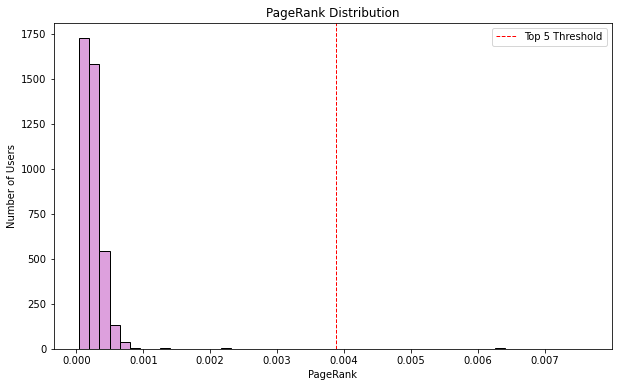

In [29]:
# Extract PageRank values
pagerank_values = list(pagerank.values())

plt.figure(figsize=(10,6))
plt.hist(pagerank_values, bins=50, color='plum', edgecolor='black')
plt.title("PageRank Distribution")
plt.xlabel("PageRank")
plt.ylabel("Number of Users")
plt.axvline(x=top_pagerank[-1][1], color='red', linestyle='dashed', linewidth=1, label=f"Top {TOP_N} Threshold")
plt.legend()
plt.show()


Detailed identification of key influencers

In [34]:
from collections import Counter

# Combine all top users into a single list
all_top_users = [user for user, _ in top_degree] + \
               [user for user, _ in top_closeness] + \
               [user for user, _ in top_betweenness] + \
               [user for user, _ in top_pagerank]

# Count the frequency of each user in the top lists
top_user_counts = Counter(all_top_users)

# Users appearing in multiple top lists
influential_users = [user for user, count in top_user_counts.items() if count > 1]

print("Key Influencers (appearing in multiple top centrality measures):")
for user in influential_users:
    print(f"User {user}")

# For a more detailed view, create a dataframe
import pandas as pd

# Create a dataframe for top users
top_users_data = {
    'UserID': [],
    'Degree Centrality': [],
    'Closeness Centrality': [],
    'Betweenness Centrality': [],
    'PageRank': []
}

for user in influential_users:
    top_users_data['UserID'].append(user)
    top_users_data['Degree Centrality'].append(degree_centrality[user])
    top_users_data['Closeness Centrality'].append(closeness_centrality[user])
    top_users_data['Betweenness Centrality'].append(betweenness_centrality[user])
    top_users_data['PageRank'].append(pagerank[user])

# Convert to DataFrame
top_users_df = pd.DataFrame(top_users_data)

# Display the DataFrame
print("\nDetailed Metrics of Key Influencers:")
print(top_users_df.sort_values(by='Degree Centrality', ascending=False))


Key Influencers (appearing in multiple top centrality measures):
User 107
User 1684
User 1912
User 3437
User 0

Detailed Metrics of Key Influencers:
   UserID  Degree Centrality  Closeness Centrality  Betweenness Centrality  \
0     107           0.258791              0.459699                0.480518   
1    1684           0.196137              0.393606                0.337797   
2    1912           0.186974              0.350947                0.229295   
3    3437           0.135463              0.314413                0.236115   
4       0           0.085934              0.353343                0.146306   

   PageRank  
0  0.006936  
1  0.006367  
2  0.003877  
3  0.007615  
4  0.006290  


How it differs from general population?

In [35]:
import numpy as np

# Function to calculate statistics
def centrality_stats(centrality, top_users):
    values = np.array(list(centrality.values()))
    top_values = np.array([centrality[user] for user in top_users])
    population_mean = np.mean(values)
    population_std = np.std(values)
    top_mean = np.mean(top_values)
    top_std = np.std(top_values)
    return population_mean, population_std, top_mean, top_std

# Degree Centrality
deg_pop_mean, deg_pop_std, deg_top_mean, deg_top_std = centrality_stats(degree_centrality, influential_users)

# Closeness Centrality
close_pop_mean, close_pop_std, close_top_mean, close_top_std = centrality_stats(closeness_centrality, influential_users)

# Betweenness Centrality
bet_pop_mean, bet_pop_std, bet_top_mean, bet_top_std = centrality_stats(betweenness_centrality, influential_users)

# PageRank
pr_pop_mean, pr_pop_std, pr_top_mean, pr_top_std = centrality_stats(pagerank, influential_users)

# Display the statistics
stats_data = {
    'Measure': ['Degree Centrality', 'Closeness Centrality', 'Betweenness Centrality', 'PageRank'],
    'Population Mean': [deg_pop_mean, close_pop_mean, bet_pop_mean, pr_pop_mean],
    'Population Std Dev': [deg_pop_std, close_pop_std, bet_pop_std, pr_pop_std],
    'Top Users Mean': [deg_top_mean, close_top_mean, bet_top_mean, pr_top_mean],
    'Top Users Std Dev': [deg_top_std, close_top_std, bet_top_std, pr_top_std]
}

stats_df = pd.DataFrame(stats_data)
print(stats_df)


                  Measure  Population Mean  Population Std Dev  \
0       Degree Centrality         0.010820            0.012980   
1    Closeness Centrality         0.276168            0.036120   
2  Betweenness Centrality         0.000667            0.011645   
3                PageRank         0.000248            0.000259   

   Top Users Mean  Top Users Std Dev  
0        0.172660           0.058446  
1        0.374402           0.049471  
2        0.286006           0.114663  
3        0.006217           0.001263  


visualization of influencers vs population

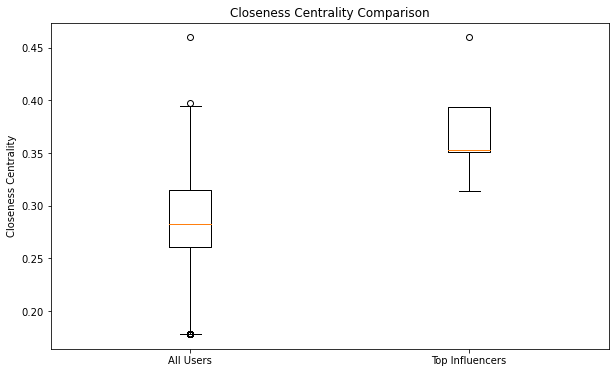

In [38]:
import matplotlib.pyplot as plt

# Ensure closeness_centrality.values() is converted to a list
all_users_closeness = list(closeness_centrality.values())
top_influencers_closeness = [closeness_centrality[user] for user in influential_users]

plt.figure(figsize=(10,6))
plt.boxplot([all_users_closeness, top_influencers_closeness], 
            labels=['All Users', 'Top Influencers'])
plt.title("Closeness Centrality Comparison")
plt.ylabel("Closeness Centrality")
plt.show()


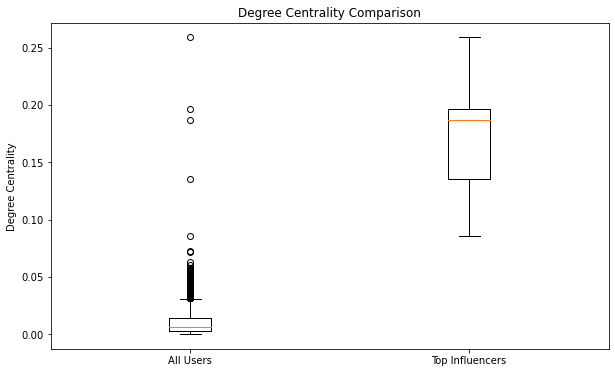

In [44]:
plt.figure(figsize=(10,6))
all_degree = list(degree_centrality.values())
top_influencers_closeness = [degree_centrality[user] for user in influential_users]

plt.boxplot([all_degree, top_influencers_closeness], labels=['All Users', 'Top Influencers'])
plt.title("Degree Centrality Comparison")
plt.ylabel("Degree Centrality")
plt.show()


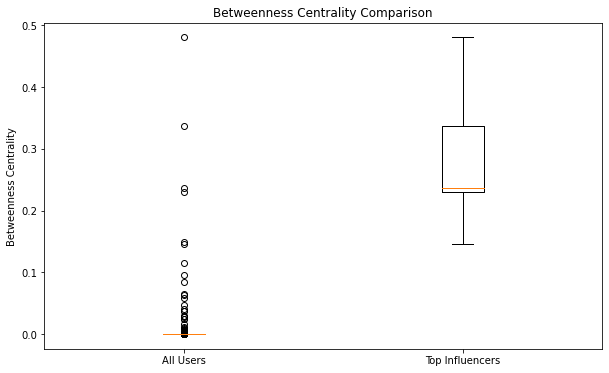

In [45]:
plt.figure(figsize=(10,6))

# Convert dict values to list for betweenness centrality
all_betweenness = list(betweenness_centrality.values())
top_influencers_betweenness = [betweenness_centrality[user] for user in influential_users]

plt.boxplot([all_betweenness, top_influencers_betweenness], labels=['All Users', 'Top Influencers'])
plt.title("Betweenness Centrality Comparison")
plt.ylabel("Betweenness Centrality")

plt.show()


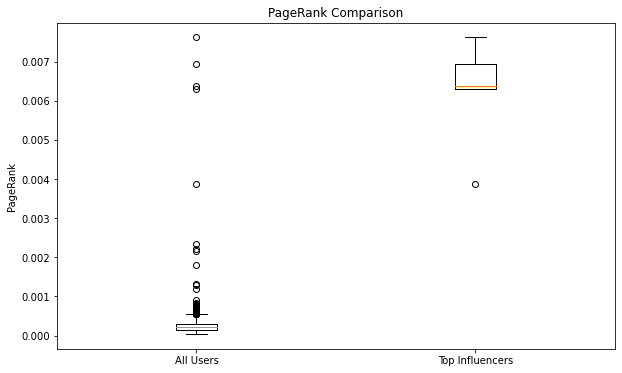

In [46]:
plt.figure(figsize=(10,6))

# Convert dict values to list for PageRank
all_pagerank = list(pagerank.values())
top_influencers_pagerank = [pagerank[user] for user in influential_users]

plt.boxplot([all_pagerank, top_influencers_pagerank], labels=['All Users', 'Top Influencers'])
plt.title("PageRank Comparison")
plt.ylabel("PageRank")

plt.show()


Summary of Key Influencers Analysis
Identification: Using centrality measures, I pinpointed users who are highly connected, strategically positioned, and influential within the network.

Differentiation: These key influencers exhibit centrality scores that are significantly higher than the average, making them stand out as pivotal players.

Strategic Engagement: Tailored business strategies, including personalized outreach, collaborative marketing, and exclusive incentives, can effectively engage these influencers, leveraging their position to amplify your brand's reach and impact.

    
Next Steps:
With key influencers identified, consider the following advanced analyses and actions to further harness the network's potential:

-Community Detection:

Identify clusters within the network and understand how influencers are distributed across communities.

-Influence Propagation Modeling:

Simulate how information spreads through the network, leveraging the positions of key influencers.

-Sentiment Analysis:

Analyze the sentiment of communications involving influencers to gauge public perception.

-Network Evolution Tracking:

Monitor how influencers' centrality measures change over time, indicating shifts in influence and network dynamics.

-Integration with User Attributes:

Merge centrality data with user attributes (from ego files) to understand demographic or behavioral characteristics of influencers.


# 4)Community Detection

In [47]:
pip install networkx python-louvain pandas matplotlib seaborn

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for python-louvain: filename=python_louvain-0.16-py3-none-any.whl size=9414 sha256=90bbe29ecb880a191d5dbbff75a6abff25f07d1b57a154dea73787ba5ccd015e
  Stored in directory: c:\users\anant\appdata\local\pip\cache\wheels\4d\7c\b6\79b198e4ec43f915fbdf967953d48b89a18893b12aa9df0ae2
Successfully built python-louvain
Note: you may need to restart the kernel to use updated packages.


considering age and location

In [57]:
import os
import pandas as pd

# Directory containing ego feature files
feat_dir = 'facebook/'

# Initialize a dictionary to store user attributes
user_attributes = {}

# Iterate through each ego file
for filename in os.listdir(feat_dir):
    if filename.endswith('.feat'):
        ego_id = int(filename.split('.')[0])  # Extract ego ID from filename
        feat_file = os.path.join(feat_dir, filename)
        
        # Load features
        with open(feat_file, 'r') as f:
            lines = f.readlines()
            for line in lines:
                parts = line.strip().split()
                if not parts:
                    continue  # Skip empty lines
                friend_id = int(parts[0])
                features = list(map(float, parts[1:]))
                
                gender_features = features[77:79]
                if sum(gender_features) == 0:
                    gender = 'Unknown'
                elif gender_features[0] == 1:
                    gender = 'Male'
                elif gender_features[1] == 1:
                    gender = 'Female'
                else:
                    gender = 'Unknown'
                
                # Extract school from features 24-52
                # Assuming one-hot encoding for different school IDs
                school_features = features[24:53]
                schools = [i + 24 for i, val in enumerate(school_features) if val == 1]
                if not schools:
                    schools = ['Unknown']
                
                # Assign attributes
                user_attributes[friend_id] = {
                    'gender': gender,
                    'schools': schools  # List of school IDs
                }

# Convert to DataFrame
attributes_df = pd.DataFrame.from_dict(user_attributes, orient='index')

# Reset index to have UserID as a column
attributes_df = attributes_df.reset_index().rename(columns={'index': 'UserID'})

# Filter only users in the LCC
attributes_df = attributes_df[attributes_df['UserID'].isin(G_lcc.nodes())]

print(attributes_df.head())


   UserID  gender    schools
0       1    Male  [Unknown]
1       2  Female       [35]
2       3  Female   [34, 50]
3       4  Female       [50]
4       5  Female   [49, 50]


Louvain Community Detection Algo

In [77]:
# Perform Louvain community detection
partition = community_louvain.best_partition(G_lcc, random_state=42)

# Add community information to the graph
nx.set_node_attributes(G_lcc, partition, 'community')

# Number of communities detected
num_communities = len(set(partition.values()))
print(f"Number of communities detected: {num_communities}")


Number of communities detected: 15


In [78]:
# Convert partition to DataFrame
community_df = pd.DataFrame(list(partition.items()), columns=['UserID', 'Community'])

# Merge with attributes
community_attributes = community_df.merge(attributes_df, on='UserID', how='left')

print(community_attributes.tail())


      UserID  Community gender primary_school
4034    4034         14   Male             27
4035    4035         14   Male             27
4036    4036         14   Male             27
4037    4037         14   Male        Unknown
4038    4038         14   Male             27


Analyzing detected communities

C:\Users\anant\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\anant\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\anant\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


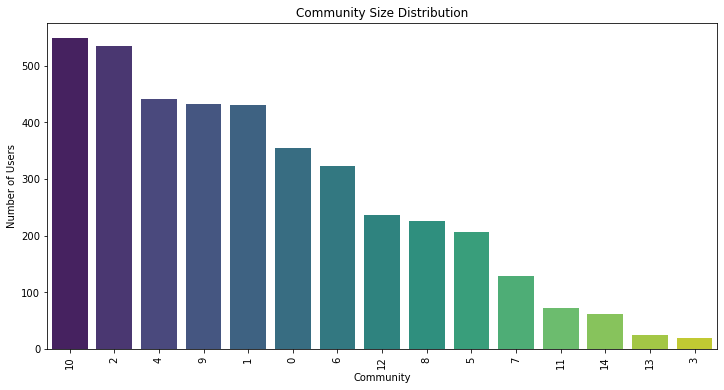

In [79]:
# Calculate community sizes
community_sizes = community_df['Community'].value_counts().sort_values(ascending=False)

# Plot community size distribution
plt.figure(figsize=(12,6))
sns.barplot(x=community_sizes.index.astype(str), y=community_sizes.values, palette='viridis')
plt.title("Community Size Distribution")
plt.xlabel("Community")
plt.ylabel("Number of Users")
plt.xticks(rotation=90)
plt.show()


gender distribution

C:\Users\anant\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\anant\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\anant\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\anant\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

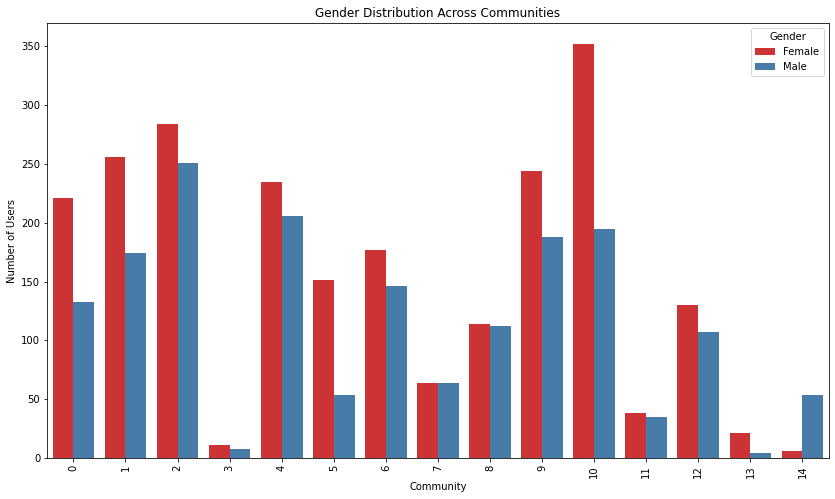

In [80]:
plt.figure(figsize=(14,8))
sns.countplot(x='Community', hue='gender', data=community_attributes, palette='Set1')
plt.title("Gender Distribution Across Communities")
plt.xlabel("Community")
plt.ylabel("Number of Users")
plt.legend(title='Gender')
plt.xticks(rotation=90)
plt.show()


school distribution across communities

C:\Users\anant\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\anant\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\anant\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\anant\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

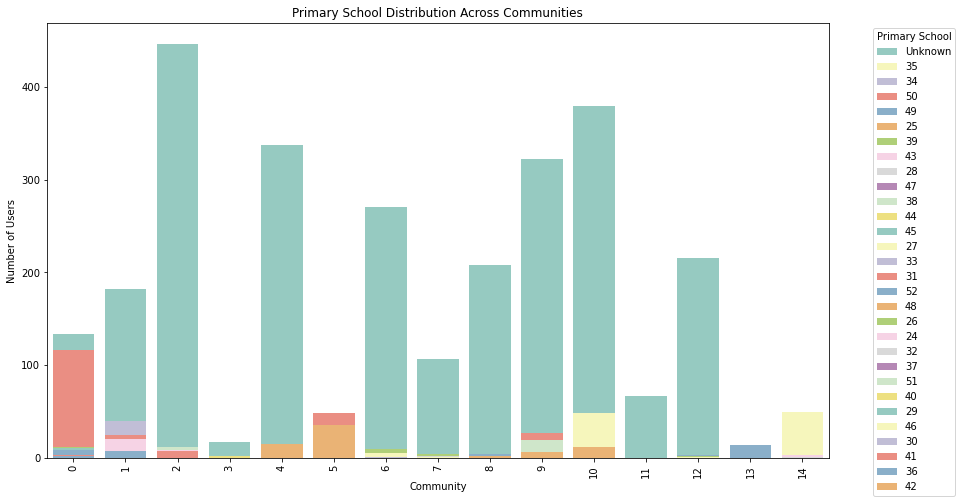

In [71]:
plt.figure(figsize=(14,8))
sns.countplot(x='Community', hue='primary_school', data=community_attributes, palette='Set3', dodge=False)
plt.title("Primary School Distribution Across Communities")
plt.xlabel("Community")
plt.ylabel("Number of Users")
plt.legend(title='Primary School', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()


In [81]:
# Create pivot table
pivot_gender_school = community_attributes.pivot_table(index='Community', 
                                                       columns=['gender', 'primary_school'], 
                                                       aggfunc='size', 
                                                       fill_value=0)

print(pivot_gender_school.head())


gender         Female                                ... Male                  \
primary_school     24  25 26 27 28 30  31 32  33 34  ...   41  43 44 45 47 49   
Community                                            ...                        
0                   1   2  0  1  2  1   2  1   5  2  ...    0   4  1  2  5  1   
1                  19  28  9  2  6  4  24  0  39  2  ...    0  23  0  0  2  0   
2                   8   2  7  0  1  1   5  0   2  2  ...    0   1  0  0  2  0   
3                   0   0  0  0  0  0   0  0   0  0  ...    0   0  0  0  0  0   
4                   2   2  0  0  1  2   0  0   0  0  ...    0   3  0  3  1  0   

gender                            
primary_school  50 51 52 Unknown  
Community                         
0               38  2  4      52  
1                0  1  1     101  
2                0  2  0     227  
3                0  0  0       8  
4                1  0  3     181  

[5 rows x 54 columns]


Based on the community analysis focusing on gender and school, here are tailored strategies to engage each community effectively.

1. Gender-Specific Campaigns
Objective: Create campaigns that resonate with the dominant gender within a community.

Strategies:

Female-Dominated Communities:
Promote products or services aligned with interests commonly associated with female users.
Example: Fashion, beauty products, wellness programs.
Male-Dominated Communities:
Focus on products or services catering to male interests.
Example: Technology gadgets, sports-related products, automotive services.
2. School-Centric Engagement
Objective: Leverage school affiliations to foster community loyalty and advocacy.

Strategies:

Alumni Networks:
Organize alumni events or reunions to provide networking opportunities for users sharing the same school background.
Collaborative Projects:
Encourage collaborative projects or group activities that tap into shared school experiences.
Exclusive Content:
Share content reflecting the history, achievements, or notable alumni of specific schools to enhance relatability.
3. Enhancing User Activity in Passive Communities
Objective: Boost engagement and interaction within less active communities.

Strategies:

Interactive Events:
Host webinars, Q&A sessions, or virtual meetups to stimulate interaction.
Gamification:
Introduce gamified elements like badges, leaderboards, or challenges to motivate participation.
Content Personalization:
Deliver personalized content aligning with the interests and preferences of users within these communities.
4. Addressing 'Unknown' Attributes
Objective: Encourage users to complete their profiles, enhancing data quality and personalization.

Strategies:

Profile Completion Incentives:
Offer incentives such as discounts or access to exclusive features for users who complete their profiles.
Interactive Prompts:
Implement prompts or reminders encouraging users to update their information.
Simplified Data Entry:
Make the profile update process user-friendly, minimizing the effort required to provide accurate information.
5. Leveraging Highly Active and Influential Communities
Objective: Utilize active communities as hubs for information dissemination and brand advocacy.

Strategies:

Influencer Partnerships:
Collaborate with key influencers or highly connected users within these communities to amplify marketing messages.
Community Challenges:
Launch challenges or campaigns that encourage users to participate and share, leveraging their high activity levels.
Exclusive Previews:
Offer sneak peeks or early access to products, fostering a sense of exclusivity and engagement.

# 5)Recommendation Engine

Factors to Consider
- Node Similarity
Feature-Based Similarity: Users with similar attributes (e.g., interests, education, location) are more likely to be interested in connecting. Use features like school, job, or common interests to measure similarity.
Community Membership: Users within the same community or connected communities often share similar interests and are more likely to connect.
- Graph Properties
Common Neighbors: Users who share many common neighbors are likely to have mutual interests. This can be computed by finding the intersection of neighbors.
Jaccard Index: Measures similarity between users based on the ratio of common friends to total unique friends.
Adamic-Adar Index: Gives more weight to less common neighbors, which helps to identify connections that might be less obvious but still significant.
Preferential Attachment: Users with many connections are more likely to get new connections, which can be used to recommend popular users.
- User Activity
Interaction Frequency: Users who frequently interact with their connections may benefit from connecting with other active users.
Engagement Metrics: High engagement users (e.g., those who post frequently or have many interactions) might be more likely to connect with others who are also engaged.
- Node Centrality
Degree Centrality: Users with a high number of connections might be influential or popular, making them ideal candidates for new connections.
Betweenness Centrality: Users who act as bridges between different parts of the network can facilitate connections across communities.
Closeness Centrality: Users who are close to many others in the network can be recommended to improve overall network connectivity.

Algo design
We'll design a recommendation system using several methods based on graph properties:

Common Neighbors Method
Jaccard Index
Adamic-Adar Index
Personalized PageRank

 Common Neighbors Method
This method recommends users who share a high number of common neighbors with the target user.

Jaccard Index
The Jaccard Index measures similarity based on the ratio of common neighbors to total neighbors.

 Adamic-Adar Index
The Adamic-Adar Index gives more weight to connections with less common neighbors.

In [95]:
import networkx as nx
import numpy as np

def compute_common_neighbors(G, user_id):
    neighbors = set(G.neighbors(user_id))
    scores = {}
    for node in G.nodes():
        if node != user_id and node not in neighbors:
            common_neighbors = neighbors.intersection(set(G.neighbors(node)))
            scores[node] = len(common_neighbors)
    return scores

def compute_jaccard_index(G, user_id):
    neighbors = set(G.neighbors(user_id))
    scores = {}
    for node in G.nodes():
        if node != user_id:
            neighbors_node = set(G.neighbors(node))
            intersection = len(neighbors.intersection(neighbors_node))
            union = len(neighbors.union(neighbors_node))
            jaccard_index = intersection / union if union > 0 else 0
            scores[node] = jaccard_index
    return scores

def compute_adamic_adar_index(G, user_id):
    neighbors = set(G.neighbors(user_id))
    scores = {}
    for node in G.nodes():
        if node != user_id:
            common_neighbors = neighbors.intersection(set(G.neighbors(node)))
            score = sum(1 / np.log(len(set(G.neighbors(n)))) for n in common_neighbors if len(set(G.neighbors(n))) > 0)
            scores[node] = score
    return scores

def recommend_connections(G, user_id, top_n=10):
    common_neighbors_scores = compute_common_neighbors(G, user_id)
    jaccard_scores = compute_jaccard_index(G, user_id)
    adamic_adar_scores = compute_adamic_adar_index(G, user_id)
    
    # Combine scores
    combined_scores = {}
    all_nodes = set(common_neighbors_scores) | set(jaccard_scores) | set(adamic_adar_scores)
    for node in all_nodes:
        combined_scores[node] = (
            common_neighbors_scores.get(node, 0) +
            jaccard_scores.get(node, 0) +
            adamic_adar_scores.get(node, 0)
        )
    
    # Sort by combined score and return top N recommendations
    recommendations = sorted(combined_scores.items(), key=lambda x: x[1], reverse=True)
    
    return recommendations[:top_n]

def incorporate_centrality(G, user_id, recommendations):
    centrality_scores = {
        node: (G.degree(node) + nx.betweenness_centrality(G).get(node, 0))
        for node in G.nodes()
    }
    
    updated_recommendations = []
    for node, score in recommendations:
        if node in centrality_scores:
            updated_score = score + centrality_scores[node]
            updated_recommendations.append((node, updated_score))
        else:
            updated_recommendations.append((node, score))
    
    return sorted(updated_recommendations, key=lambda x: x[1], reverse=True)


In [ ]:
user_id=1
recommendations = recommend_connections(G, user_id)

# Incorporate centrality
final_recommendations = incorporate_centrality(G, user_id, recommendations)

# 6)Interpretation and Business Insights

Based on the network analysis, some actionable business insights:

### **1. Leveraging Key Influencers**

**Insight:**
Key influencers in the network are users with high centrality measures, such as degree centrality, closeness centrality, betweenness centrality, or high PageRank scores. 

**Actionable Strategies:**
- **Targeted Marketing:** Develop personalized marketing campaigns directed at key influencers. These users are likely to have a strong impact on their connections, so promoting products or campaigns through them can amplify reach and effectiveness.
- **Exclusive Offers:** Provide exclusive offers or early access to new products for influencers to increase their engagement and promote positive word-of-mouth.
- **Partnerships:** Collaborate with influencers to create branded content or endorsements that leverage their authority and reach.

### **2. Utilizing Community Structures**

**Insight:**
Understanding community structures can help in tailoring marketing strategies to specific segments.

**Actionable Strategies:**
- **Segmented Campaigns:** Design marketing campaigns tailored to the interests and characteristics of different communities. For example, if one community is highly engaged with educational content, promote educational products or services within that community.
- **Localized Promotions:** Offer community-specific promotions or events that resonate with the cultural or regional traits of each community.
- **User Retention:** Identify active communities that are at risk of becoming inactive and develop strategies to re-engage them, such as through community-driven events or exclusive content.

### **3. Additional Network-Based Strategies**

**Insight:**
network-based strategies can enhance user engagement and growth.

**Actionable Strategies:**
- **Recommendation Systems:** Use network-based recommendation systems to suggest friends or connections, which can increase user engagement and retention by expanding users' social circles.
- **Influencer Detection:** Regularly update your analysis to identify emerging influencers and adapt your marketing strategies accordingly.
- **Feedback Loops:** Implement mechanisms to gather feedback from users on their network connections and interactions to continuously refine recommendation algorithms and marketing strategies.
- **Virality Analysis:** Study the patterns of how information spreads through the network to design viral marketing campaigns that capitalize on the network’s structure.


These strategies will help optimize user engagement, improve marketing effectiveness, and drive growth within the social network.